<b>The goal of this project is to train a fully connected neural network with few hidden layers to classify images in Fashion MNIST dataset. Zalando is a multinational e-commerce platform selling fashion goods in many European
countries. It released a Fashion MNIST dataset – a set of (60,000 train + 10,000 test) images of 10 types of clothes.</b>

In [1]:
import tensorflow, os, time
from tensorflow import keras
from tensorflow.python.client import device_lib
device_lib.list_local_devices()
from sklearn.metrics import confusion_matrix
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
import seaborn as sn

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
def load_func(dpart):
    df = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/fashion-mnist_{dpart}.csv')
    labels = df.values[:,0]
    images = df.values[:,1:]
    return labels, images

In [4]:
train_labels, train_images = load_func('train')
test_labels, test_images = load_func('test')



Normalization

In [5]:
train_images = train_images/np.float32(255)
test_images = test_images/np.float32(255)

Convert 2d array into 1d array

In [6]:
def Convert_2d_1d(ndarray):
    dims=ndarray.shape
    res = [ndarray[i].flatten() for i in range(dims[0])]
    res=np.array(res)
    return res
train_images_mod = Convert_2d_1d(train_images)
test_images_mod  = Convert_2d_1d(test_images)

Reshape the data. Grayscale image -> data with 1 channel. Labels = categorical.

In [7]:
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [39]:
train = train_images_mod.reshape(60000,28,28,1)
test = test_images_mod.reshape(10000,28,28,1)
label_train = to_categorical(train_labels)
label_test  = to_categorical(test_labels)


Validation set 

In [40]:
train, train_val, label_train, label_train_val = train_test_split(train, label_train, test_size = 0.2, random_state = 1)


Build a 3-layer model 

In [41]:
model = Sequential()
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation='softmax'))

In [42]:
model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='adam',
                  metrics=['accuracy'])

Fit

In [43]:
model_training = model.fit(train,label_train,batch_size=64,epochs=50,verbose=1,
                           validation_data=(train_val,label_train_val))

Epoch 1/50
750/750 [==============================] - 3s 4ms/step - loss: 0.5513 - accuracy: 0.8083 - val_loss: 0.4341 - val_accuracy: 0.8508
Epoch 2/50
750/750 [==============================] - 2s 3ms/step - loss: 0.4073 - accuracy: 0.8564 - val_loss: 0.4178 - val_accuracy: 0.8534
Epoch 3/50
750/750 [==============================] - 3s 3ms/step - loss: 0.3638 - accuracy: 0.8699 - val_loss: 0.3553 - val_accuracy: 0.8749
Epoch 4/50
750/750 [==============================] - 3s 3ms/step - loss: 0.3353 - accuracy: 0.8790 - val_loss: 0.3612 - val_accuracy: 0.8712
Epoch 5/50
750/750 [==============================] - 2s 3ms/step - loss: 0.3171 - accuracy: 0.8851 - val_loss: 0.3581 - val_accuracy: 0.8763
Epoch 6/50
750/750 [==============================] - 3s 3ms/step - loss: 0.3022 - accuracy: 0.8902 - val_loss: 0.3270 - val_accuracy: 0.8820
Epoch 7/50
750/750 [==============================] - 2s 3ms/step - loss: 0.2867 - accuracy: 0.8950 - val_loss: 0.3358 - val_accuracy: 0.8802
Epoch 

Plot accuracies and losses of the model

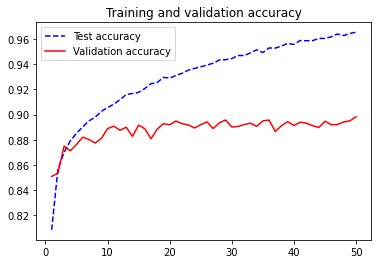

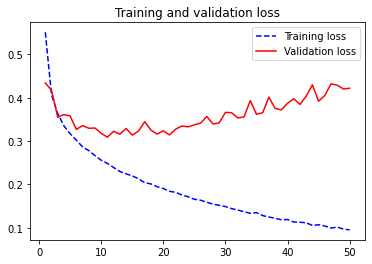

In [44]:
model_accuracy = model_training.history['accuracy']
model_val_accuracy = model_training.history['val_accuracy']
loss = model_training.history['loss'] 
val_loss  = model_training.history['val_loss']
epochs = [i for i in range (1,51)]

plt.plot(epochs, model_accuracy, 'b--', label = 'Test accuracy')
plt.plot(epochs, model_val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.savefig('Accuracy values')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b--', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('Loss values')
plt.show()

In [45]:
accuracy = model.evaluate(test,label_test,verbose=1)
print('The accuracy of CNN is equal to : ' + str(accuracy[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.4098 - accuracy: 0.8964
The accuracy of CNN is equal to : 0.896399974822998


In [46]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dense_19 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [47]:
predict = np.argmax(model.predict(test), axis=1)


In [48]:
conf = confusion_matrix(y_true=test_labels, y_pred=predict)
conf

array([[863,   1,  20,  31,   2,   1,  75,   0,   7,   0],
       [  3, 986,   1,   7,   0,   0,   2,   0,   1,   0],
       [ 22,   0, 827,  13,  78,   1,  57,   0,   2,   0],
       [ 23,  18,   6, 912,  22,   2,  16,   0,   1,   0],
       [  1,   0,  73,  35, 841,   1,  47,   0,   2,   0],
       [  1,   0,   0,   1,   0, 944,   0,  32,   4,  18],
       [126,   2,  71,  32,  53,   1, 705,   0,  10,   0],
       [  0,   0,   0,   0,   0,  10,   0, 963,   1,  26],
       [  6,   1,   5,   6,   1,   3,   6,   3, 968,   1],
       [  0,   0,   0,   0,   0,   3,   0,  40,   2, 955]])

Build a 6 layer model

In [16]:
model = Sequential()
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(10,activation='softmax'))


In [17]:
model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='adam',
                  metrics=['accuracy'])

In [18]:
model_training = model.fit(train,label_train,batch_size=64,epochs=50,verbose=1,
                           validation_data=(train_val,label_train_val))

Epoch 1/50
750/750 [==============================] - 10s 13ms/step - loss: 0.5122 - accuracy: 0.8160 - val_loss: 0.4097 - val_accuracy: 0.8501
Epoch 2/50
750/750 [==============================] - 9s 12ms/step - loss: 0.3790 - accuracy: 0.8600 - val_loss: 0.3665 - val_accuracy: 0.8666
Epoch 3/50
750/750 [==============================] - 10s 13ms/step - loss: 0.3440 - accuracy: 0.8742 - val_loss: 0.3377 - val_accuracy: 0.8763
Epoch 4/50
750/750 [==============================] - 10s 13ms/step - loss: 0.3190 - accuracy: 0.8813 - val_loss: 0.3466 - val_accuracy: 0.8691
Epoch 5/50
750/750 [==============================] - 9s 12ms/step - loss: 0.2958 - accuracy: 0.8914 - val_loss: 0.3384 - val_accuracy: 0.8802
Epoch 6/50
750/750 [==============================] - 9s 12ms/step - loss: 0.2820 - accuracy: 0.8942 - val_loss: 0.3845 - val_accuracy: 0.8626
Epoch 7/50
750/750 [==============================] - 9s 12ms/step - loss: 0.2672 - accuracy: 0.9007 - val_loss: 0.3306 - val_accuracy: 0.8

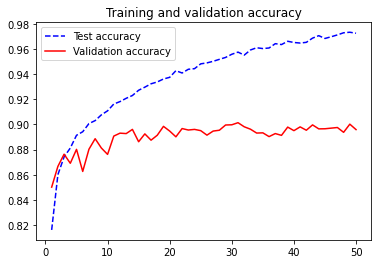

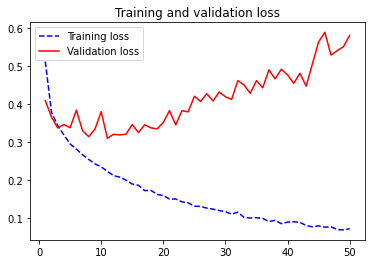

In [19]:
model_accuracy = model_training.history['accuracy']
model_val_accuracy = model_training.history['val_accuracy']
loss = model_training.history['loss'] 
val_loss  = model_training.history['val_loss']
epochs = [i for i in range (1,51)]

plt.plot(epochs, model_accuracy, 'b--', label = 'Test accuracy')
plt.plot(epochs, model_val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.savefig('Accuracy values')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b--', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('Loss values')
plt.show()

In [20]:
accuracy = model.evaluate(test,label_test,verbose=1)
print('The accuracy of CNN is equal to : ' + str(accuracy[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.6127 - accuracy: 0.8952
The accuracy of CNN is equal to : 0.8952000141143799


In [21]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 128)               65664     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
Total params: 739,146
Trainable params: 739,146
Non-tr

Build a 12 layer model

In [22]:
model = Sequential()
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dense(256,activation = 'relu'))
model.add(Dense(256,activation = 'relu'))
model.add(Dense(256,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(10,activation='softmax'))


In [23]:
model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='adam',
                  metrics=['accuracy'])

In [24]:
model_training = model.fit(train,label_train,batch_size=64,epochs=50,verbose=1,
                           validation_data=(train_val,label_train_val))


Epoch 1/50
750/750 [==============================] - 17s 21ms/step - loss: 0.6332 - accuracy: 0.7707 - val_loss: 0.4780 - val_accuracy: 0.8286
Epoch 2/50
750/750 [==============================] - 15s 20ms/step - loss: 0.4283 - accuracy: 0.8471 - val_loss: 0.3917 - val_accuracy: 0.8588
Epoch 3/50
750/750 [==============================] - 15s 20ms/step - loss: 0.3807 - accuracy: 0.8644 - val_loss: 0.3886 - val_accuracy: 0.8581
Epoch 4/50
750/750 [==============================] - 15s 20ms/step - loss: 0.3566 - accuracy: 0.8731 - val_loss: 0.3541 - val_accuracy: 0.8707
Epoch 5/50
750/750 [==============================] - 15s 20ms/step - loss: 0.3377 - accuracy: 0.8798 - val_loss: 0.3819 - val_accuracy: 0.8680
Epoch 6/50
750/750 [==============================] - 15s 20ms/step - loss: 0.3212 - accuracy: 0.8838 - val_loss: 0.3643 - val_accuracy: 0.8776
Epoch 7/50
750/750 [==============================] - 15s 20ms/step - loss: 0.3106 - accuracy: 0.8886 - val_loss: 0.3312 - val_accuracy:

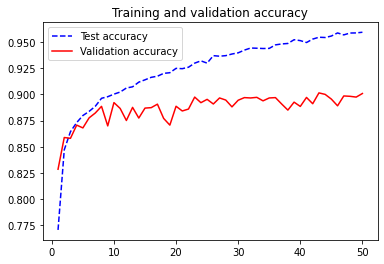

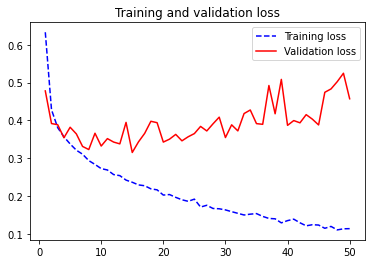

In [25]:
model_accuracy = model_training.history['accuracy']
model_val_accuracy = model_training.history['val_accuracy']
loss = model_training.history['loss'] 
val_loss  = model_training.history['val_loss']
epochs = [i for i in range (1,51)]

plt.plot(epochs, model_accuracy, 'b--', label = 'Test accuracy')
plt.plot(epochs, model_val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.savefig('Accuracy values')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b--', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('Loss values')
plt.show()

In [26]:
accuracy = model.evaluate(test,label_test,verbose=1)
print('The accuracy of CNN is equal to : ' + str(accuracy[1]))

313/313 [==============================] - 2s 5ms/step - loss: 0.4861 - accuracy: 0.8951
The accuracy of CNN is equal to : 0.8950999975204468


In [27]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               401920    
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 dense_9 (Dense)             (None, 512)               262656    
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 256)               65792     
                                                                 
 dense_12 (Dense)            (None, 256)              

For all 3 models, loss is decreasing to 0 as epochs increase wuth the training data, and the accuracy is increasing to 1, which are the ‘perfect score’. This means an overfitting of the models. The validation model shows that the loss function is less than 0.50 for NN3 and is passing 0.5 for NN6 and NN12. It also seems as if the slop stabilizes around 0.4-0.5 for NN12 but not for the other models. The accuracy slope stabilizes between 0.88 and 0.90 for all 3 models. 

It also seems like NN3 test performs better - having the lowest loss score and same acuuracy as NN12. The confusion matrix is shown above (under NN3 model).